#House Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.duplicated().sum()

529

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [ ]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

for filling null values
location - mode
size convert into numerical and fill with

In [ ]:
df.shape

(12791, 9)

In [ ]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [ ]:
df.shape

(12791, 9)

In [ ]:
df['society'] = df['society'].fillna('Unknown')

In [ ]:
df.shape

(12791, 9)

In [ ]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])

In [ ]:
df.shape

(12791, 9)

In [ ]:
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])

In [ ]:
df.shape

(12791, 9)

In [ ]:
df.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [ ]:
df.shape

(12791, 9)

In [ ]:
df['total_sqrt_numericals'] = df['size'].str.split().str[0]
df['total_sqrt_numericals'] = pd.to_numeric(df['total_sqrt_numericals'],errors='coerce')


In [ ]:
df=df.drop('size',axis=1)

In [ ]:
df.shape

(12791, 9)

In [ ]:
df['total_sqrt_numericals'] = df['total_sqrt_numericals'].fillna(df['total_sqrt_numericals'].mode()[0])

In [ ]:
df.shape

(12791, 9)

In [ ]:
def calculate_mean(x):
  try:
    if '-' in x:
      values = x.split('-')
      if len(values) == 2:
        mean_value = (float(values[0]) + float(values[1])) / 2
        return mean_value
    else:
      return float(x)
  except ValueError:
    return np.nan
  return float(x)
df['total_sqft'] = df['total_sqft'].apply(calculate_mean)

In [ ]:
df.shape

(12791, 9)

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(12745, 9)

In [ ]:
df.describe()

,total_sqft,bath,balcony,price,total_sqrt_numericals
count,12745.00000,12745.000000,12745.000000,12745.000000,12745.000000
mean,1569.60368,2.703099,1.603295,114.207350,2.815771
std,1259.83493,1.352340,0.807231,151.591687,1.308425
min,1.00000,1.000000,0.000000,8.000000,1.000000
25%,1100.00000,2.000000,1.000000,50.000000,2.000000
50%,1280.00000,2.000000,2.000000,73.000000,3.000000
75%,1691.00000,3.000000,2.000000,120.000000,3.000000
max,52272.00000,40.000000,3.000000,3600.000000,43.000000


In [ ]:
df.isnull().sum()

area_type                0
availability             0
location                 0
society                  0
total_sqft               0
bath                     0
balcony                  0
price                    0
total_sqrt_numericals    0
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['area_type', 'availability', 'location', 'society'], dtype='object')

Numerical type columns:
Index(['total_sqft', 'bath', 'balcony', 'price', 'total_sqrt_numericals'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 20:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['area_type']
Non-Categorical Features: ['availability', 'location', 'society']
Discrete Features: ['bath', 'balcony', 'total_sqrt_numericals']
Continuous Features: ['total_sqft', 'price']


#Data Visualization

In [ ]:
for i in discrete :
    print(i)
    print(df[i].unique())
    print()

bath
[ 2.  5.  3.  4.  6.  1.  9.  8.  7. 11. 10. 14. 27. 12. 16. 40. 15. 13.
 18.]

balcony
[1. 3. 2. 0.]

total_sqrt_numericals
[ 2.  4.  3.  6.  1.  8.  7.  5. 11.  9. 27. 10. 19. 16. 43. 14. 12. 13.
 18.]



In [ ]:
for i in discrete :
    print(i)
    print(df[i].value_counts())
    print()

bath
bath
2.0     6604
3.0     3169
4.0     1194
1.0      755
5.0      517
6.0      267
7.0      102
8.0       64
9.0       40
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

balcony
balcony
2.0    5435
1.0    4683
3.0    1627
0.0    1000
Name: count, dtype: int64

total_sqrt_numericals
total_sqrt_numericals
2.0     5251
3.0     4641
4.0     1393
1.0      629
5.0      346
6.0      220
7.0       99
8.0       88
9.0       52
10.0      14
11.0       4
27.0       1
19.0       1
16.0       1
43.0       1
14.0       1
12.0       1
13.0       1
18.0       1
Name: count, dtype: int64



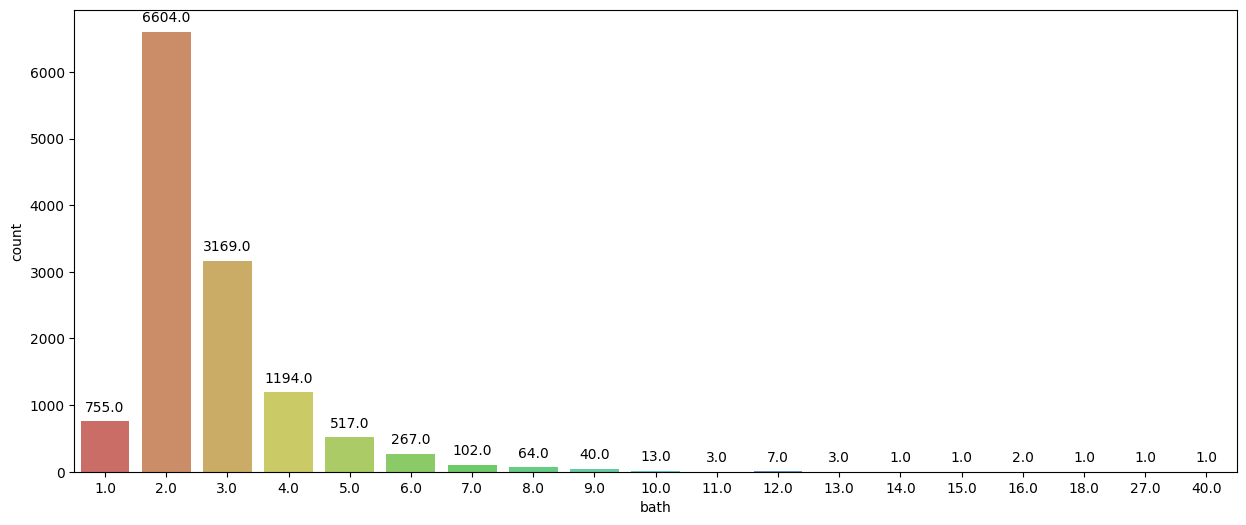

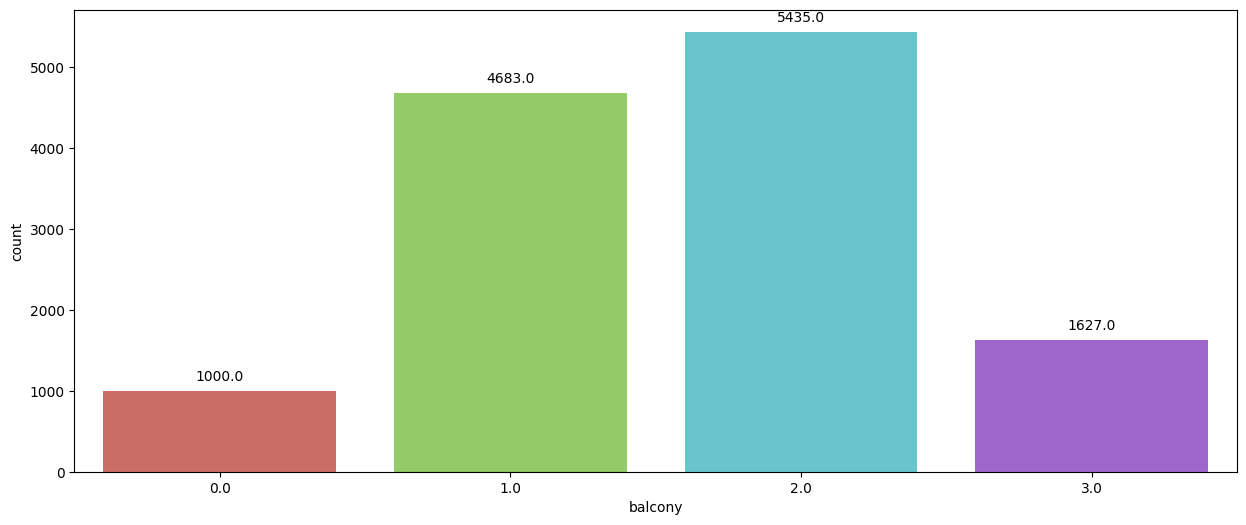

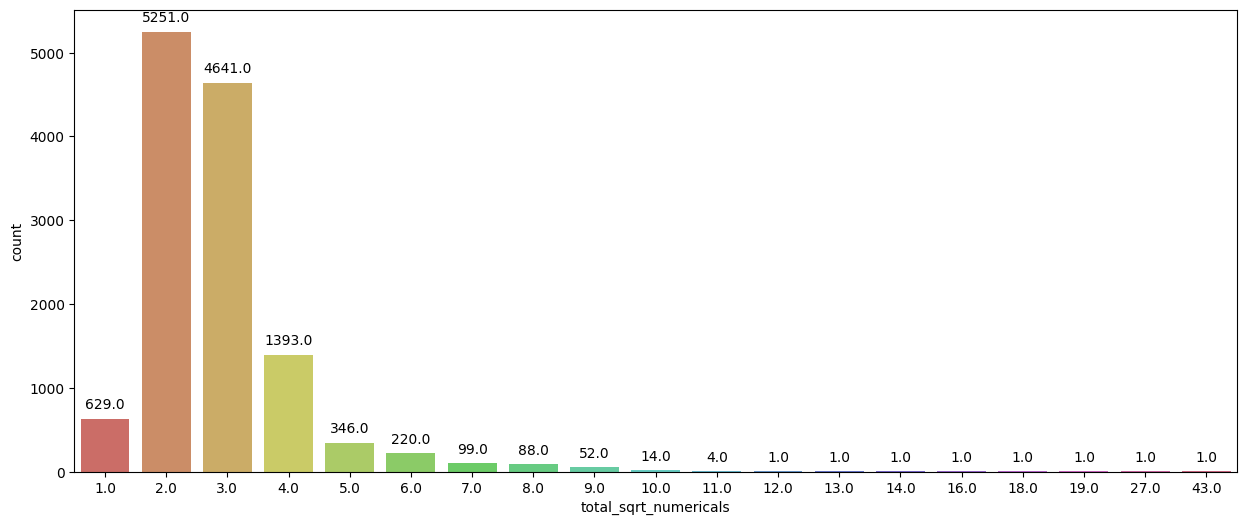

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
for i in categorical:
    print(df[i].unique())
    print()

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']



In [ ]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

area_type
area_type
Super built-up  Area    8306
Built-up  Area          2382
Plot  Area              1971
Carpet  Area              86
Name: count, dtype: int64



In [ ]:
df[df['total_sqrt_numericals'] > 5]

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numericals
9,Plot Area,Ready To Move,Gandhi Bazar,Unknown,1020.0,6.0,2.0,370.0,6.0
45,Plot Area,Ready To Move,HSR Layout,Unknown,600.0,9.0,2.0,200.0,8.0
58,Plot Area,Ready To Move,Murugeshpalya,Unknown,1407.0,4.0,1.0,150.0,6.0
64,Built-up Area,Ready To Move,Bommanahalli,Unknown,3000.0,8.0,0.0,140.0,8.0
68,Plot Area,Ready To Move,Devarachikkanahalli,Unknown,1350.0,7.0,0.0,85.0,8.0
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,Ready To Move,Laggere,Unknown,1590.0,9.0,3.0,132.0,7.0
13221,Plot Area,Ready To Move,T Dasarahalli,Unknown,1178.0,9.0,1.0,75.0,9.0
13226,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Unknown,6000.0,8.0,3.0,215.0,8.0
13277,Plot Area,Ready To Move,Kundalahalli Colony,Unknown,1400.0,7.0,2.0,218.0,7.0


feature engineering - creating new features from existing features

In [ ]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [ ]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numericals,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [ ]:
data1 = df.copy()

In [ ]:
data1['location'].value_counts()

location
Whitefield                        522
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    247
Thanisandra                       228
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1299, dtype: int64

In [ ]:
location_stats = data1['location'].value_counts()

In [ ]:
len(location_stats[location_stats<=20])

1160

In [ ]:
loclessthan20 = location_stats[location_stats<=20]
loclessthan20

location
Binny Pete                        20
Kogilu                            20
Yelachenahalli                    20
Sanjay nagar                      20
HBR Layout                        20
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1160, dtype: int64

In [ ]:
data1.location = data1.location.apply(lambda x : 'other' if x in loclessthan20 else x)
len(data1.location.unique())

140

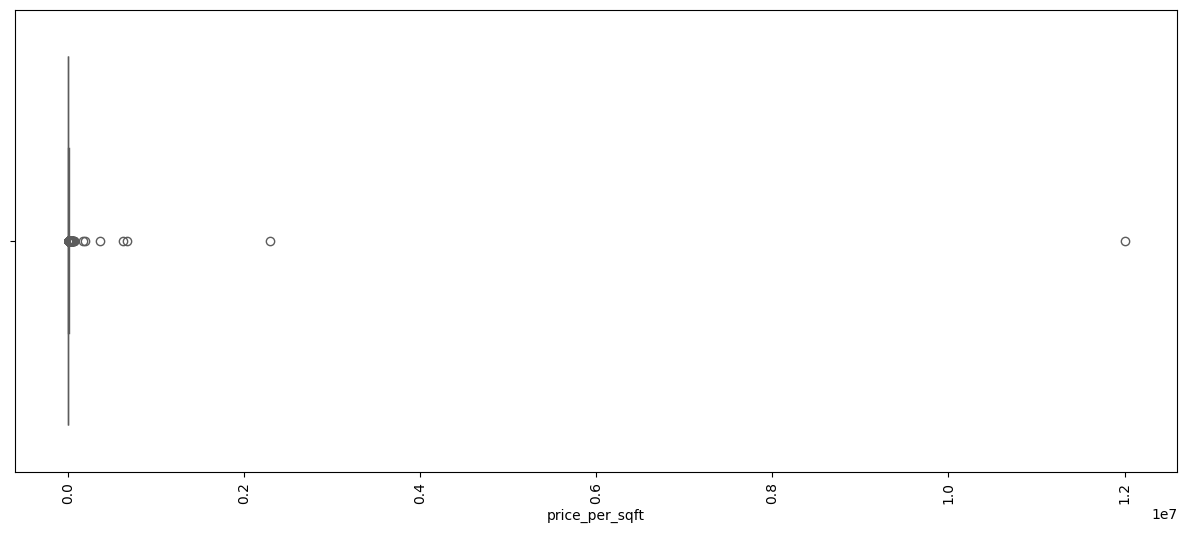

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['price_per_sqft'],data=df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'price', 'total_sqrt_numericals', 'price_per_sqft'],
      dtype='object')

In [ ]:
df1 = df[['total_sqft','bath', 'balcony', 'price', 'total_sqrt_numericals', 'price_per_sqft']]

outlier detection and removal

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
Q1

total_sqft               1100.000000
bath                        2.000000
balcony                     1.000000
price                      50.000000
total_sqrt_numericals       2.000000
price_per_sqft           4298.558682
Name: 0.25, dtype: float64

In [ ]:
Q3

total_sqft               1691.000000
bath                        3.000000
balcony                     2.000000
price                     120.000000
total_sqrt_numericals       3.000000
price_per_sqft           7398.708162
Name: 0.75, dtype: float64

In [ ]:
IQR

total_sqft                591.00000
bath                        1.00000
balcony                     1.00000
price                      70.00000
total_sqrt_numericals       1.00000
price_per_sqft           3100.14948
dtype: float64

In [ ]:
x = Q1 - 1.5*IQR

In [ ]:
x

total_sqft               213.500000
bath                       0.500000
balcony                   -0.500000
price                    -55.000000
total_sqrt_numericals      0.500000
price_per_sqft          -351.665538
dtype: float64

In [ ]:

x = Q1 + 1.5*IQR

In [ ]:
x

total_sqft               1986.500000
bath                        3.500000
balcony                     2.500000
price                     155.000000
total_sqrt_numericals       3.500000
price_per_sqft           8948.782902
dtype: float64

In [ ]:
data1 = data1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
data1

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numericals,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2.0,3247.863248
...,...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,92.13,3.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,52.71,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,47.00,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3.0,6530.612245


In [ ]:
data1.duplicated().sum()

51

In [ ]:
data1.isnull().sum()

area_type                0
availability             0
location                 0
society                  0
total_sqft               0
bath                     0
balcony                  0
price                    0
total_sqrt_numericals    0
price_per_sqft           0
dtype: int64

In [ ]:
corr = df1.corr() #we get correlation matrix for df1 bcoz it have only numerical values

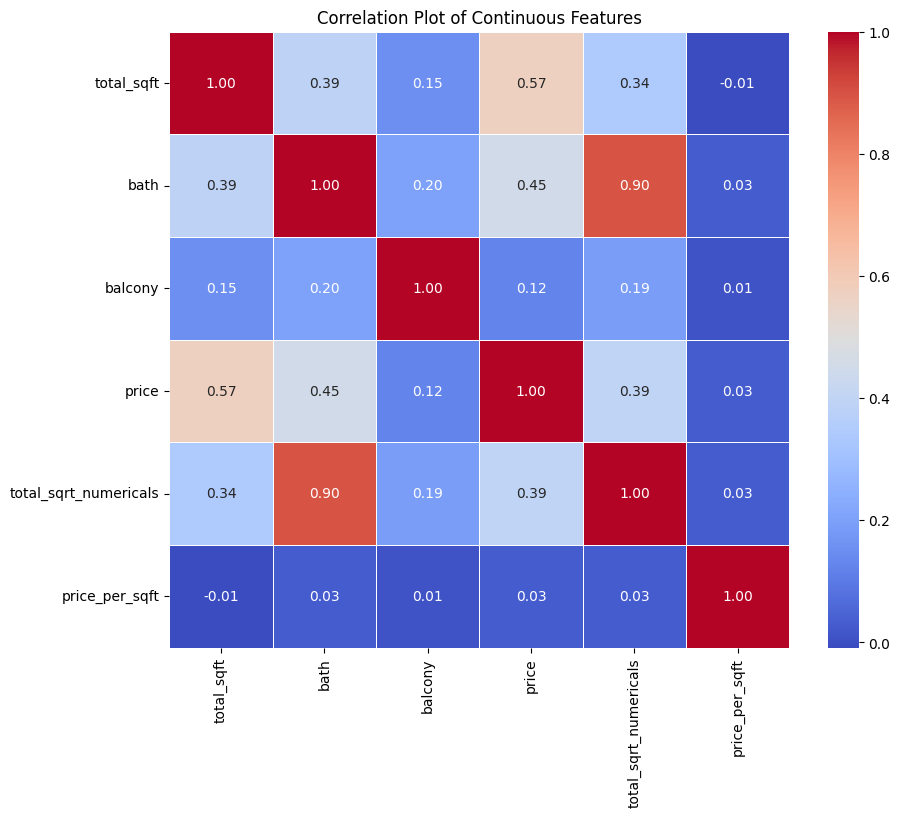

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [ ]:
data1 = data1.drop('total_sqrt_numericals',axis=1)

In [ ]:
data1

,area_type,availability,location,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,3247.863248
...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,92.13,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,52.71,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,47.00,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,6530.612245


In [ ]:
data1 = data1.drop('price',axis=1)

In [ ]:
data1

,area_type,availability,location,society,total_sqft,bath,balcony,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,3247.863248
...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,6530.612245


In [ ]:
data1.nunique()

area_type            4
availability        81
location           140
society           2433
total_sqft        1483
bath                 4
balcony              4
price_per_sqft    6400
dtype: int64

In [ ]:
data1 = data1.drop('society',axis=1)

In [ ]:
data1.duplicated().sum()

154

In [ ]:
data1.drop_duplicates()

,area_type,availability,location,total_sqft,bath,balcony,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,1.0,3247.863248
...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,1675.0,3.0,2.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,1050.0,2.0,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,1262.0,2.0,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,1715.0,3.0,3.0,6530.612245


In [ ]:
data1['availability'] = data1['availability'].apply(lambda x: 'Not Ready' if x != 'Ready To Move' else x)

In [ ]:
data1

,area_type,availability,location,total_sqft,bath,balcony,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,1056.0,2.0,1.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,1.0,3247.863248
...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,1675.0,3.0,2.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,1050.0,2.0,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,1262.0,2.0,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,1715.0,3.0,3.0,6530.612245


In [ ]:
df2=df[['total_sqft','bath', 'balcony', 'price', 'total_sqrt_numericals', 'price_per_sqft']]

In [ ]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
Q3

total_sqft               1691.000000
bath                        3.000000
balcony                     2.000000
price                     120.000000
total_sqrt_numericals       3.000000
price_per_sqft           7398.708162
Name: 0.75, dtype: float64

In [ ]:
Q1

total_sqft               1100.000000
bath                        2.000000
balcony                     1.000000
price                      50.000000
total_sqrt_numericals       2.000000
price_per_sqft           4298.558682
Name: 0.25, dtype: float64

In [ ]:
IQR

total_sqft                591.00000
bath                        1.00000
balcony                     1.00000
price                      70.00000
total_sqrt_numericals       1.00000
price_per_sqft           3100.14948
dtype: float64

In [ ]:
data1 = data1[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
data1

,area_type,availability,location,total_sqft,bath,balcony,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,1056.0,2.0,1.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,1.0,3247.863248
...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,1675.0,3.0,2.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,1050.0,2.0,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,1262.0,2.0,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,1715.0,3.0,3.0,6530.612245


In [ ]:
data1.nunique()

area_type            4
availability         2
location           140
total_sqft        1483
bath                 4
balcony              4
price_per_sqft    6400
dtype: int64

In [ ]:
data1 = pd.get_dummies(data1,columns=['area_type','availability','location'])

In [ ]:
data1

,total_sqft,bath,balcony,price_per_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Not Ready,availability_Ready To Move,...,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,1056.0,2.0,1.0,3699.810606,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,4305.555556,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,6245.890861,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,4250.000000,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,1.0,3247.863248,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,1675.0,3.0,2.0,5500.298507,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
13310,1050.0,2.0,2.0,5020.000000,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
13312,1262.0,2.0,2.0,3724.247227,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
13314,1715.0,3.0,3.0,6530.612245,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


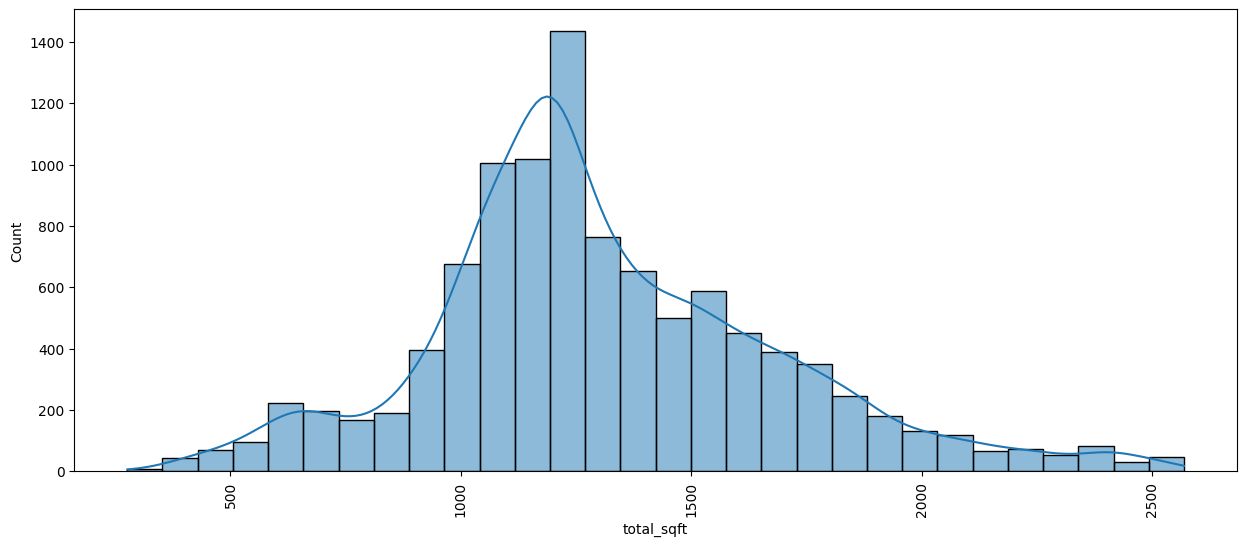

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data1['total_sqft'], bins = 30, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data1['price_per_sqft'] = np.log(data1['price_per_sqft'])

In [ ]:
data1['total_sqft'] = np.log(data1['total_sqft'])

In [ ]:
X=data1.drop(['price_per_sqft'],axis=1)

In [ ]:
y=data1['price_per_sqft']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06820370558743288


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.33336912578500744


In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridgeReg = Ridge()
ridgeReg.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred = ridgeReg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0682176656850669


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.3332326781827879


In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: -0.0025166011441515312


In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model =SVR()

In [ ]:
svr_model.fit(X_train,y_train)

SVR()

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06867025152888276


In [ ]:
svr_model = SVR(kernel = 'linear')

In [ ]:
svr_model.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06983266738645698
